<a href="https://colab.research.google.com/github/tohsin/Tuberculosis_classfication/blob/main/tuberculosis_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/Colab Notebooks")

In [ ]:
!ls

assets		      submission2.csv	     traffic.
birthday_girl	      submission4.csv	     trafficmodel1.h5
classifier.ipynb      submission5.csv	     trafficmodel2.h5
crop_zindi.ipynb      submission6.csv	     trafficmodel3.h5
fingerprintNet	      submission7.csv	     train
model1.h5	      submission8.csv	     Train.csv
model.h5	      submission.csv	     tuberculosis_classification.ipynb
requirements.txt      taxi.ipynb	     Untitled0.ipynb
SampleSubmission.csv  test		     variables
saved_model.pb	      Test.csv		     web_scraping.ipynb
space_invaders.ipynb  torch_practice1.ipynb
submission1.csv       traffic


In [ ]:
test_size = len(os.listdir('test'))
train_size = len(os.listdir('train'))
print ("size of provided training set =" + str(train_size))
print ('size of provided test set with only ID features provided =' + str(test_size))

size of provided training set =732
size of provided test set with only ID features provided =82


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import skimage
import tensorflow.keras as Keras
import matplotlib.pyplot as plt

In [ ]:
# plt.imshow(os.listdir('test_small')[1])
from IPython.display import Image

In [ ]:
train_items = os.listdir('train')
image_dir = 'train/'
print (train_items)

['JVWMAACC.png', 'AIZUCFFK.png', 'VTYNBFTO (1).png', 'OYWWUOWH.png', 'JHTCIMYN.png', 'JXISWDUU.png', 'VTYNBFTO.png', 'PMRSQLXN.png', 'FZEXTXAJ.png', 'TBEKBNLE.png', 'GVVXXDOZ.png', 'CEWWTIOE.png', 'BEVSIXCX.png', 'LGUDIEPL.png', 'JVSLFECC.png', 'IBDUGRFB.png', 'HWLWTMTN.png', 'QQVMLLKX.png', 'OBNDNCQX.png', 'JYFDCXHT.png', 'EZBZZJKL.png', 'MKLCBYUX.png', 'CXZCWMVW.png', 'JHWTQUDZ.png', 'HQUNCZDY.png', 'TNPPVXSI.png', 'LPNACQVF.png', 'UGEGSZIC.png', 'DKYJMJLK.png', 'IVHGOVWQ.png', 'OBKDAWUP.png', 'GSVSCTMU.png', 'ZPCFSUYI.png', 'ORAFBXIF.png', 'DMFDHWBE.png', 'QUODETZF.png', 'CFRRIAAS.png', 'KDQGNEMY.png', 'SKKCARSR.png', 'JGXSNQNL.png', 'RNSQHQSR.png', 'YPORVRYN.png', 'XYCCCRUA.png', 'UFYBRFYD.png', 'RRYIUFCJ.png', 'OFYNGUVH.png', 'YUBBRMXT.png', 'HGRLBLRY.png', 'PBLWDVKV.png', 'EXGMTURL.png', 'HCIQKZEX.png', 'CILUDDLA.png', 'VKSLNUGA.png', 'AWJBUPTD.png', 'FKGZWSMI.png', 'EPXQPDQS.png', 'GMHHMMXV.png', 'NNRBAUQD.png', 'WSQUGIKO.png', 'YZYFKATY.png', 'EVFXNDFU.png', 'SPYRKEUU.png', 'FC

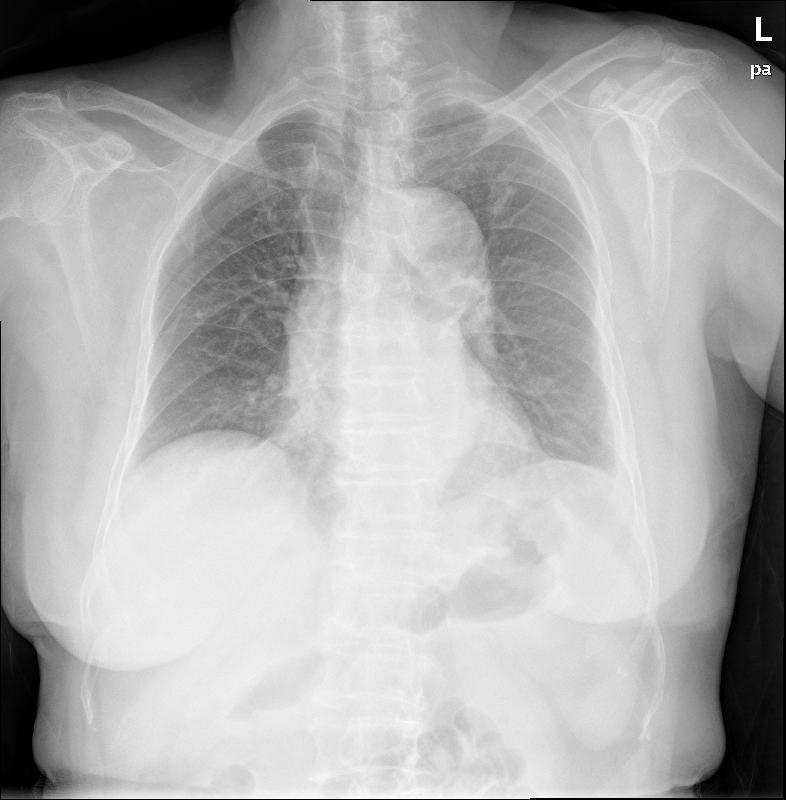

In [ ]:

Image(filename = image_dir + train_items[0])

In [ ]:
from PIL import Image
print(Image.open(image_dir + train_items[5]).size)

(800, 798)


In [ ]:
dataf = pd.DataFrame(data = train_items)
dataf['size'] = dataf[0].apply(lambda x: Image.open(image_dir + str(x)).size)
dataf.head()

,0,size
0,JVWMAACC.png,"(786, 800)"
1,AIZUCFFK.png,"(798, 800)"
2,VTYNBFTO (1).png,"(657, 800)"
3,OYWWUOWH.png,"(679, 800)"
4,JHTCIMYN.png,"(800, 786)"


In [ ]:
datat = pd.read_csv('Train.csv', dtype = str)
# datat['size'] = datat['filename'].apply(lambda x: Image.open(str(x)).size)
datat

,filename,ID,LABEL
0,train/VTYNBFTO.png,VTYNBFTO,1
1,train/GVVXXDOZ.png,GVVXXDOZ,0
2,train/PMRSQLXN.png,PMRSQLXN,0
3,train/JXISWDUU.png,JXISWDUU,1
4,train/JVWMAACC.png,JVWMAACC,1
...,...,...,...
713,train/EWGJDECH.png,EWGJDECH,1
714,train/CJEVKQUT.png,CJEVKQUT,1
715,train/YDXXBDGI.png,YDXXBDGI,1
716,train/QLUOORWZ.png,QLUOORWZ,0


In [ ]:
# df1 = datat
# df2 = dataf

# # # keys = list(df2.columns.values)
# # # i1 = df1.set_index(keys).index
# # # i2 = df2.set_index(keys).index
# # # df1[~i1.isin(i2)]
# df2.rename(columns={0:'filename'})
# print (df1.columns.values)
# df2['filename'] = df2[0]
# df2.drop(columns =0)
# # print (df2.columns.values)

['filename' 'ID' 'LABEL']


,filename
0,train/GKTPBGZP.png
1,train/KHIMVBMD.png
2,train/ZKETEOFG.png
3,train/GTWSHFYQ.png
4,train/KUTPOASE.png
...,...
77,train/UHRZNUCQ.png
78,train/OPSQITNE.png
79,train/KIRUHEIC.png
80,train/ZPPGWFUO.png


In [ ]:
df3 = pd.DataFrame(df2['filename'])


NameError: ignored

In [ ]:
keys = list(df3.columns.values)
i1 = df1.set_index(keys).index
i2 = df3.set_index(keys).index
print (i2.size)
df1[~i2.isin(i1)]

82


ValueError: ignored

In [ ]:
df3.set_index('filename')
df1.set_index('filename')
df4 = df1[df1.index.isin(df3.index)]

In [ ]:
df4

,filename,ID,LABEL
0,train/VTYNBFTO.png,VTYNBFTO,1
1,train/GVVXXDOZ.png,GVVXXDOZ,0
2,train/PMRSQLXN.png,PMRSQLXN,0
3,train/JXISWDUU.png,JXISWDUU,1
4,train/JVWMAACC.png,JVWMAACC,1
...,...,...,...
77,train/UAMFOFNX.png,UAMFOFNX,1
78,train/SFKBBWYB.png,SFKBBWYB,1
79,train/LDEDUSWM.png,LDEDUSWM,0
80,train/RWRXFEAW.png,RWRXFEAW,1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=None,y 
    data_format=None,
    validation_split=0.2,
    dtype=None,
)
train_generator = datagenerator.flow_from_dataframe(
    dataframe = datat,
    directory='./',
    x_col="filename",
    y_col="LABEL",
    weight_col=None,
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="sparse",
    batch_size=16,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='training',
    interpolation="nearest",
    validate_filenames=True,
)
validation_generator = datagenerator.flow_from_dataframe(
    dataframe = datat,
    directory = './',
    x_col="filename",
    y_col="LABEL",
    weight_col=None,
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="binary",
    batch_size=16,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='validation',
    interpolation="nearest",
    validate_filenames=True,
)

Found 575 validated image filenames belonging to 2 classes.
Found 143 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
model = DenseNet121(include_top = False, weights='imagenet', pooling='avg', input_shape=(224, 224, 3))

29089792/29084464 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Model

In [ ]:
flat1 = Flatten()(model.layers[-1].output)
dense = Dense(1024, kernel_regularizer = 'l1_l2')(flat1)
norm = BatchNormalization()(dense)
active = Activation('relu')(norm)
dense2 = Dense(256, kernel_regularizer = 'l1_l2')(active)
norm2 = BatchNormalization()(dense2)
active2 = Activation('relu')(norm2)
output = Dense(1, activation = 'sigmoid')(active2)

In [ ]:
for layer in model.layers:
	layer.trainable = False

In [ ]:
model_improved = Model(inputs = model.input, outputs = output)

In [ ]:
model_improved.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_improved.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:

history = model_improved.fit(
    train_generator,
    steps_per_epoch= train_generator.samples//16,
    epochs= 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//16

)

Epoch 1/100
35/35 [==============================] - 17s 482ms/step - loss: 0.8557 - accuracy: 0.5367 - val_loss: 0.6173 - val_accuracy: 0.7812
Epoch 2/100
35/35 [==============================] - 15s 429ms/step - loss: 0.7606 - accuracy: 0.5939 - val_loss: 0.7041 - val_accuracy: 0.7969
Epoch 3/100
35/35 [==============================] - 15s 425ms/step - loss: 0.7798 - accuracy: 0.5850 - val_loss: 0.6844 - val_accuracy: 0.7656
Epoch 4/100
35/35 [==============================] - 15s 425ms/step - loss: 0.8115 - accuracy: 0.5474 - val_loss: 0.7859 - val_accuracy: 0.7891
Epoch 5/100
35/35 [==============================] - 15s 426ms/step - loss: 0.7743 - accuracy: 0.5742 - val_loss: 0.8999 - val_accuracy: 0.8047
Epoch 6/100
35/35 [==============================] - 15s 427ms/step - loss: 0.7923 - accuracy: 0.5778 - val_loss: 0.8355 - val_accuracy: 0.7734
Epoch 7/100
35/35 [==============================] - 15s 425ms/step - loss: 0.7393 - accuracy: 0.6047 - val_loss: 0.9168 - val_accuracy:

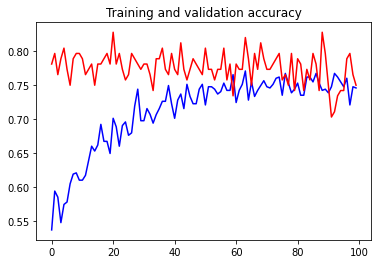

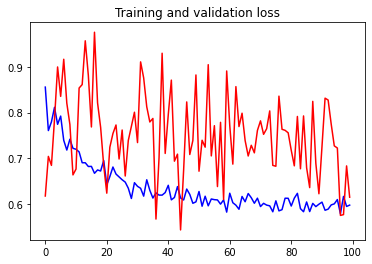

In [ ]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.show()

In [ ]:
predictions = model_improved.predict(validation_generator, steps=validation_generator.samples//16,verbose=1)

8/8 [==============================] - 3s 316ms/step


In [ ]:
predictions

array([[0.14934301],
       [0.35810953],
       [0.26329535],
       [0.12379247],
       [0.4902661 ],
       [0.04364601],
       [0.06438178],
       [0.06931773],
       [0.05274692],
       [0.20304468],
       [0.09260008],
       [0.25517207],
       [0.01650551],
       [0.13457072],
       [0.05999345],
       [0.639666  ],
       [0.20021209],
       [0.82410246],
       [0.09944242],
       [0.05801612],
       [0.40753534],
       [0.09488797],
       [0.47379556],
       [0.63960475],
       [0.22691226],
       [0.05445451],
       [0.75854886],
       [0.7442124 ],
       [0.13793612],
       [0.22631502],
       [0.23732969],
       [0.09387916],
       [0.6105162 ],
       [0.14948103],
       [0.7116618 ],
       [0.14110753],
       [0.2628146 ],
       [0.09282687],
       [0.09309134],
       [0.24660769],
       [0.09262347],
       [0.03296822],
       [0.8280729 ],
       [0.15753353],
       [0.04189444],
       [0.17903015],
       [0.5625924 ],
       [0.055

In [ ]:
datate = pd.read_csv('Test.csv')
datate

,filename,ID
0,test/GTWSHFYQ.png,GTWSHFYQ
1,test/QTFSSMGD.png,QTFSSMGD
2,test/TBLBHSYT.png,TBLBHSYT
3,test/ZKETEOFG.png,ZKETEOFG
4,test/GKTPBGZP.png,GKTPBGZP
...,...,...
77,test/UHRZNUCQ.png,UHRZNUCQ
78,test/RQZCAYRX.png,RQZCAYRX
79,test/KGOETYSK.png,KGOETYSK
80,test/ZPPGWFUO.png,ZPPGWFUO


In [ ]:
!ls

SampleSubmission.csv  Test.csv	Train.csv
test		      train	tuberculosis_classification.ipynb


In [ ]:
datate['filename']

0     test/GTWSHFYQ.png
1     test/QTFSSMGD.png
2     test/TBLBHSYT.png
3     test/ZKETEOFG.png
4     test/GKTPBGZP.png
            ...        
77    test/UHRZNUCQ.png
78    test/RQZCAYRX.png
79    test/KGOETYSK.png
80    test/ZPPGWFUO.png
81    test/KIRUHEIC.png
Name: filename, Length: 82, dtype: object

In [ ]:
test_generator = datagenerator.flow_from_dataframe(
    dataframe = datate,
    directory = './',
    x_col = 'filename',
    shuffle = False,
    target_size = (224,224),
    class_mode = None,
)

Found 82 validated image filenames.


In [ ]:
test_generator.filepaths

['./test/GTWSHFYQ.png',
 './test/QTFSSMGD.png',
 './test/TBLBHSYT.png',
 './test/ZKETEOFG.png',
 './test/GKTPBGZP.png',
 './test/KHIMVBMD.png',
 './test/KUTPOASE.png',
 './test/NVCFDCZE.png',
 './test/CHDDLHBE.png',
 './test/HIJQIQJT.png',
 './test/EBGJIADB.png',
 './test/UXFTRJWE.png',
 './test/XSPSFLYM.png',
 './test/FTBBVMHK.png',
 './test/AIJRYHWY.png',
 './test/BBWIVFOO.png',
 './test/LPFSZWIK.png',
 './test/NMXAIQPW.png',
 './test/HLQHFYIS.png',
 './test/PCPQBVFW.png',
 './test/MCIMQNFQ.png',
 './test/NQRJCNWO.png',
 './test/JAUGWQFK.png',
 './test/WTATMMWS.png',
 './test/QKBVQVUQ.png',
 './test/IBJJCNUL.png',
 './test/AAKRKIZP.png',
 './test/LGUSGVBE.png',
 './test/XFWKEWYK.png',
 './test/VRKXUDSO.png',
 './test/OZGPKWXR.png',
 './test/TUSENBWD.png',
 './test/ONZZVNYO.png',
 './test/SIEWUKNU.png',
 './test/OBZIRAIT.png',
 './test/FWEHCLXU.png',
 './test/VXDFSKHL.png',
 './test/QGQBPWLJ.png',
 './test/NNJUQOYL.png',
 './test/GBGGZUCR.png',
 './test/LWOMGDGX.png',
 './test/FHZJFRT

In [ ]:
predictions1 = model_improved.predict(test_generator,verbose=1)

3/3 [==============================] - 1s 409ms/step


In [ ]:
model_improved.save("model1.h5")

In [ ]:
model_improved.save('./')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets


In [ ]:
submission = pd.DataFrame(datate['ID'])
submission.set_index('ID')
submission['LABEL'] = predictions1
submission

,ID,LABEL
0,GTWSHFYQ,0.292351
1,QTFSSMGD,0.292351
2,TBLBHSYT,0.434987
3,ZKETEOFG,0.437012
4,GKTPBGZP,0.332355
...,...,...
77,UHRZNUCQ,0.553481
78,RQZCAYRX,0.328298
79,KGOETYSK,0.292351
80,ZPPGWFUO,0.398553


In [ ]:
submission.to_csv('submission8.csv', index=False)

In [ ]:
test_generator2 = datagenerator.flow_from_dataframe(
    dataframe = datate,
    directory = './',
    x_col = 'filename',
    shuffle = False,
    target_size = (224,224),
    batch_size = 16,
    class_mode = None,
)

Found 82 validated image filenames.


In [ ]:
predictions1 = model_improved.predict(test_generator2, steps=6,verbose=1)

6/6 [==============================] - 2s 400ms/step


In [ ]:
submission = pd.DataFrame(datate['ID'])
submission.set_index('ID')
submission['LABEL'] = predictions1
submission

,ID,LABEL
0,GTWSHFYQ,0.293501
1,QTFSSMGD,0.292351
2,TBLBHSYT,0.292351
3,ZKETEOFG,0.292351
4,GKTPBGZP,0.455434
...,...,...
77,UHRZNUCQ,0.335503
78,RQZCAYRX,0.306250
79,KGOETYSK,0.292351
80,ZPPGWFUO,0.758536


In [ ]:
submission.to_csv('submission5.csv', index=False)

In [ ]:

datagenerator2 = ImageDataGenerator(
    rescale = 1./255
)
test_generator3 = datagenerator2.flow_from_dataframe(
    dataframe = datate,
    directory = './',
    x_col = 'filename',
    shuffle = False,
    target_size = (224,224),
    batch_size = 16,
    class_mode = None,
)

Found 82 validated image filenames.


In [ ]:
predictions2 = model_improved.predict(test_generator3, steps=6,verbose=1)

6/6 [==============================] - 1s 143ms/step


In [ ]:
submission = pd.DataFrame(datate['ID'])
submission.set_index('ID')
submission['LABEL'] = predictions2
submission

,ID,LABEL
0,GTWSHFYQ,0.292351
1,QTFSSMGD,0.292351
2,TBLBHSYT,0.401544
3,ZKETEOFG,0.688500
4,GKTPBGZP,0.386963
...,...,...
77,UHRZNUCQ,0.533440
78,RQZCAYRX,0.295288
79,KGOETYSK,0.292481
80,ZPPGWFUO,0.901047


In [ ]:
submission.to_csv('submission7.csv', index=False)

i am done now.